In [1]:
%matplotlib inline
import math as mt
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


tf.reset_default_graph()
tf.set_random_seed(38742)
np.random.seed(63574)
iteration = 240

g = 9.8
theta0 = np.random.randint(90, size = 1000)
v0 = np.random.randint(100, size = 1000)
#noise = np.random.normal(0, 0.1, size=v0.shape)
R = (v0**2)*np.sin(2*theta0*np.pi/180)/g
H = (v0**2)*(np.sin(theta0*np.pi/180))**2/(2*g)
#x_data = np.linspace(-1,1,300, dtype=np.float32)[:, np.newaxis]
x_data = np.array([v0, theta0], dtype=np.float32).transpose()
y_data = np.array([R, H], dtype=np.float32).transpose()

print(x_data.shape,y_data.shape)

# constructing NN
tf_x = tf.placeholder(tf.float32, (None, 2))     # input x
tf_y = tf.placeholder(tf.float32, (None, 2))     # input y

# neural network layers
with tf.variable_scope('Net', reuse=None):
    l1 = tf.layers.dense(tf_x, 2, tf.nn.relu, name='hidden_layer1')
    l1_BN = tf.layers.batch_normalization(inputs=l1, training=True, name='batch_normalization_layer1')
    l2 = tf.layers.dense(l1_BN, 16, tf.nn.relu, name='hidden_layer2')
    l2_BN = tf.layers.batch_normalization(inputs=l2, training=True, name='batch_normalization_layer2')
    l3 = tf.layers.dense(l2_BN, 64, tf.nn.relu, name='hidden_layer3')
    l3_BN = tf.layers.batch_normalization(inputs=l3, training=True, name='batch_normalization_layer3')
    output = tf.layers.dense(l3_BN, 2)


(1000, 2) (1000, 2)
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.batch_normalization instead.


Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
step:  0
loss:  [61352.41]
Accuracy [0.285]
step:  50
loss:  [53561.457]
Accuracy [0.566]
step:  100
loss:  [37729.3]
Accuracy [0.508]
step:  150
loss:  [22273.154]
Accuracy [0.557]
step:  200
loss:  [11359.443]
Accuracy [0.614]
step:  250
loss:  [4709.7534]
Accuracy [0.697]
step:  300
loss:  [1581.3275]
Accuracy [0.784]
step:  350
loss:  [392.63986]
Accuracy [0.838]
step:  400
loss:  [143.916]
Accuracy [0.86]
step:  450
loss:  [86.347084]
Accuracy [0.868]
step:  500
loss:  [97.8298]
Accuracy [0.879]
step:  550
loss:  [60.53757]
Accuracy [0.886]
step:  600
loss:  [97.04408]
Accuracy [0.868]
step:  650
loss:  [55.12027]
Accuracy [0.922]
step:  700
loss:  [54.853233]
Accuracy [0.924]
step:  750
loss:  [53.317112]
Accuracy [0.891]
step:  800
loss:  [53.04345]
Accuracy [0.923]
step:  850
loss:  [51.16422]
Accuracy [0.887]
step:  900
loss:  [52.60341]
Accuracy [0.916]
step:  950
loss:  [55.428936

step:  8100
loss:  [6.099276]
Accuracy [0.911]
step:  8150
loss:  [5.893966]
Accuracy [0.951]
step:  8200
loss:  [6.579289]
Accuracy [0.91]
step:  8250
loss:  [23.82868]
Accuracy [0.964]
step:  8300
loss:  [6.5347366]
Accuracy [0.957]
step:  8350
loss:  [4.8798122]
Accuracy [0.932]
step:  8400
loss:  [6.231668]
Accuracy [0.917]
step:  8450
loss:  [4.978613]
Accuracy [0.92]
step:  8500
loss:  [5.2311964]
Accuracy [0.957]
step:  8550
loss:  [6.207008]
Accuracy [0.937]
step:  8600
loss:  [11.921447]
Accuracy [0.947]
step:  8650
loss:  [6.209155]
Accuracy [0.955]
step:  8700
loss:  [5.041529]
Accuracy [0.94]
step:  8750
loss:  [8.206899]
Accuracy [0.959]
step:  8800
loss:  [11.812532]
Accuracy [0.94]
step:  8850
loss:  [3.9430332]
Accuracy [0.939]
step:  8900
loss:  [4.243208]
Accuracy [0.956]
step:  8950
loss:  [4.19089]
Accuracy [0.95]
step:  9000
loss:  [4.6759033]
Accuracy [0.925]
step:  9050
loss:  [6.451775]
Accuracy [0.911]
step:  9100
loss:  [18.948648]
Accuracy [0.944]
step:  9150

<Figure size 720x360 with 0 Axes>

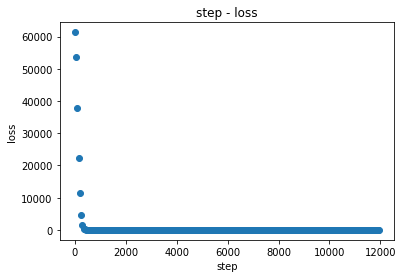

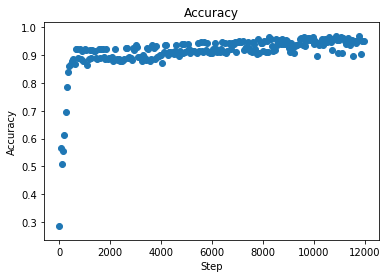

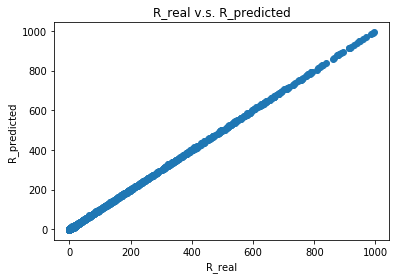

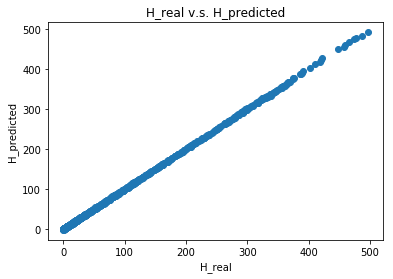

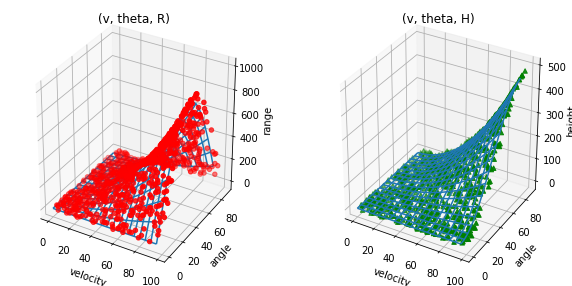

R - correlation:  [0.9999684]
H - correlation:  [0.99996024]


In [2]:
loss = tf.losses.mean_squared_error(tf_y, output)

with tf.name_scope('accuracy'):
    correct_prediction=tf.equal(tf.argmax(y_data,1),tf.argmax(output,1))
    accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    tf.summary.scalar('accuracy', accuracy) # tensorflow >= 0.12
        
train_step = tf.train.AdamOptimizer(0.005).minimize(loss)
tf.summary.scalar('loss', loss)
init = tf.global_variables_initializer()

sess = tf.Session() # control training and others 
sess.run(init)

i=0
size=range(241)
a = np.zeros((240,1),dtype=np.float32)
c = np.zeros((240,1),dtype=np.float32)
d = np.zeros((240,1),dtype=np.float32)
e = np.zeros((240,6),dtype=np.float32)
ac = np.zeros((240,1),dtype=np.float32)

for step in range(12000):
    sess.run(train_step, feed_dict={tf_x:x_data, tf_y:y_data})
    if step % 50 == 0:
        a[i] = sess.run(loss, feed_dict={tf_x:x_data, tf_y:y_data})        
        out = sess.run(output, feed_dict={tf_x: x_data})        
        c[i]=stats.pearsonr(y_data[:,0],out[:,0])[0]
        d[i]=stats.pearsonr(y_data[:,1],out[:,1])[0]
        ac[i]= sess.run(accuracy, feed_dict={tf_x:x_data, tf_y:y_data})
        e[i]=(i,step,a[i],c[i],d[i],ac[i])
        print("step: ", step)
        print("loss: ", a[i])
#         print("R - correlation: ", c[i])
#         print("H - correlation: ", d[i])
        print("Accuracy",ac[i])
       
        i=i+1
        
    if step == 11999:

        plt.figure(1, figsize=(10, 5))
        plt.figure()
        plt.scatter(e[:,1], e[:,2])
        plt.xlabel('step')
        plt.ylabel('loss')
        plt.title('step - loss')
        plt.savefig(fname = "step_loss_1000.png", format = "png")
        
#         plt.figure()
#         plt.scatter(e[:,1], e[:,3])
#         plt.xlabel('step')
#         plt.ylabel('R correlation')
#         plt.title('R - correlation')
#         plt.savefig(fname = "R_correlation_12000.png", format = "png")
            
#         plt.figure()
#         plt.scatter(e[:,1], e[:,4])
#         plt.xlabel('step')
#         plt.ylabel('H correlation')
#         plt.title('H - correlation')
#         plt.savefig(fname = "H_correlation_12000.png", format = "png")
        
        plt.figure()
        plt.scatter(e[:,1], e[:,5])
        plt.title('Accuracy')
        plt.xlabel('Step')
        plt.ylabel('Accuracy')
        plt.savefig(fname = "Accuracy_1000.png", format = "png")
        
        plt.figure()
        plt.scatter(R, out[:,0])
        plt.title('R_real v.s. R_predicted')
        plt.xlabel('R_real')
        plt.ylabel('R_predicted')
        plt.savefig(fname = "R_real_pred_1000.png", format = "png")
        
        plt.figure()
        plt.scatter(H, out[:,1])
        plt.title('H_real v.s. H_predicted')
        plt.xlabel('H_real')
        plt.ylabel('H_predicted')
        plt.savefig(fname = "H_real_pred_1000.png", format = "png")
        
        #3D plots
        def hrange(v0 , theta0):
            return (v0**2)*np.sin(2*theta0*np.pi/180)/g

        def heigh(v0 , theta0):
            return (v0**2)*(np.sin(theta0*np.pi/180))**2/(2*g)
        
        fig = plt.figure(0, figsize=(10, 5))
        ax = fig.add_subplot(121, projection='3d')
        X = np.arange(0, 100, 5)
        Y = np.arange(0, 90, 5)
        X, Y = np.meshgrid(X, Y)
        R = hrange(X, Y)
        H = heigh(X, Y)
        ax.plot_wireframe(X, Y, R)
        ax.scatter(v0, theta0, out[:,0], c='r', marker='o')
        ax.set_xlabel('velocity')
        ax.set_ylabel('angle')
        ax.set_zlabel('range')
        ax.set_title('(v, theta, R)')
        
        fig = plt.figure(0, figsize=(10, 5))
        ax = fig.add_subplot(122, projection='3d')
        ax.plot_wireframe(X, Y, H)
        ax.scatter(v0, theta0, out[:,1], c='g', marker='^')
        ax.set_xlabel('velocity')
        ax.set_ylabel('angle')
        ax.set_zlabel('height')
        ax.set_title('(v, theta, H)')
        plt.savefig(fname = "3D_1000.png", format = "png")
        
        plt.show()
        print("R - correlation: ", c[239])
        print("H - correlation: ", d[239])
    